<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-07-16 08:27:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.8MB/s    in 2.5s    

2025-07-16 08:27:57 (60.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


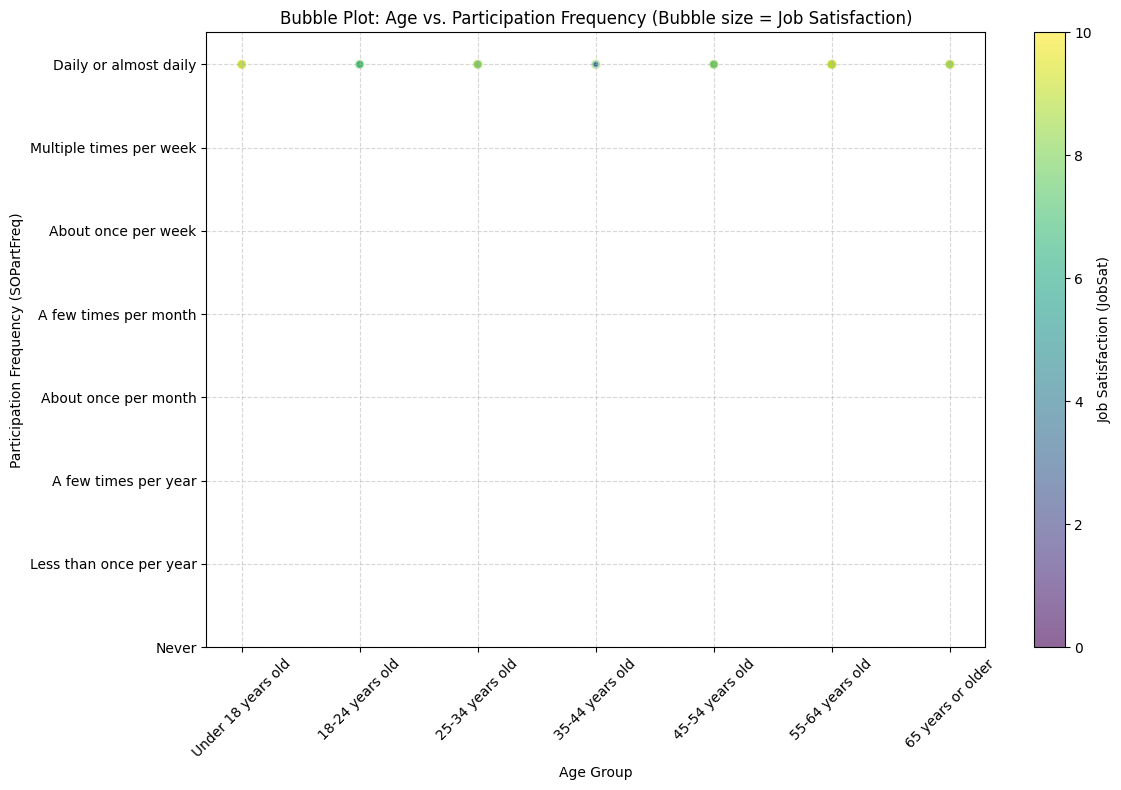

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Select relevant columns and drop rows with missing values in these
df_clean = df[['Age', 'SOPartFreq', 'JobSat']].dropna()

# Filter out "Prefer not to say" or other ambiguous Age values if present
df_clean = df_clean[df_clean['Age'] != 'Prefer not to say']

# Map categorical Age and SOPartFreq to numeric for plotting
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

freq_order = ['Never', 'Less than once per year', 'A few times per year', 
              'About once per month', 'A few times per month', 'About once per week', 
              'Multiple times per week', 'Daily or almost daily']

age_map = {age: i for i, age in enumerate(age_order)}
freq_map = {freq: i for i, freq in enumerate(freq_order)}

df_clean['Age_num'] = df_clean['Age'].map(age_map)
df_clean['SOPartFreq_num'] = df_clean['SOPartFreq'].map(freq_map)

# Remove rows where mapping failed (NaN values in numeric columns)
df_clean = df_clean.dropna(subset=['Age_num', 'SOPartFreq_num', 'JobSat'])

# Convert JobSat to numeric (if not already), fill NaNs with 0 or drop
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce').fillna(0)

# Plot bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_clean['Age_num'], 
    df_clean['SOPartFreq_num'], 
    s=df_clean['JobSat'] * 5,  # scale size for visibility
    alpha=0.6,
    c=df_clean['JobSat'],  # color by job satisfaction
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.colorbar(scatter, label='Job Satisfaction (JobSat)')
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.yticks(ticks=range(len(freq_order)), labels=freq_order)
plt.xlabel('Age Group')
plt.ylabel('Participation Frequency (SOPartFreq)')
plt.title('Bubble Plot: Age vs. Participation Frequency (Bubble size = Job Satisfaction)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


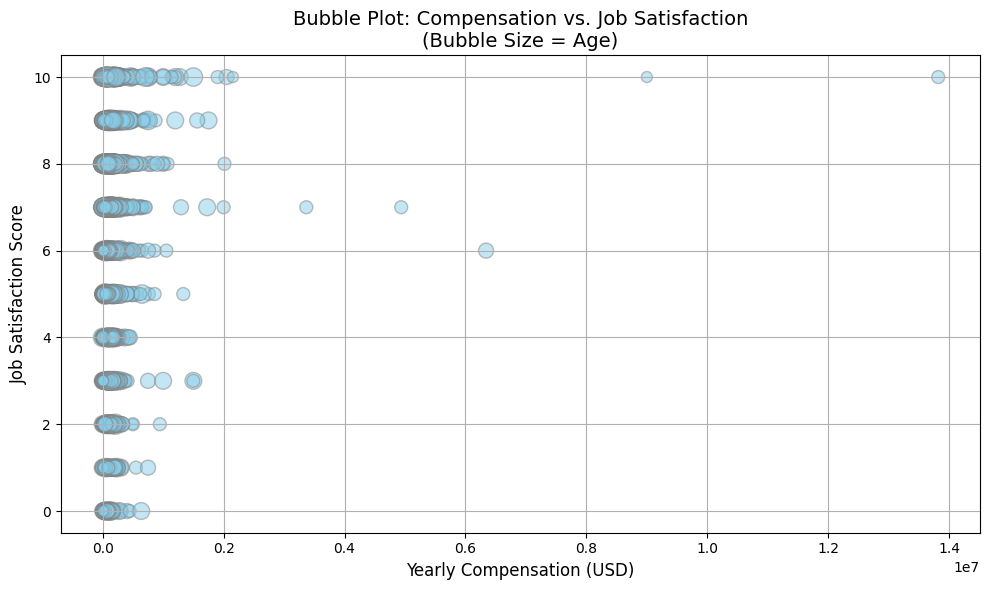

In [8]:
# Install the required packages
!pip install --quiet pandas matplotlib

# Now import them
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Clean and convert necessary columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Map Age ranges to numeric values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'AgeNum'])

# Bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean['ConvertedCompYearly'],
    df_clean['JobSat'],
    s=df_clean['AgeNum'] * 3,  # Scale bubble size
    alpha=0.5,
    c='skyblue',
    edgecolors='gray'
)

plt.title('Bubble Plot: Compensation vs. Job Satisfaction\n(Bubble Size = Age)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Job Satisfaction Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



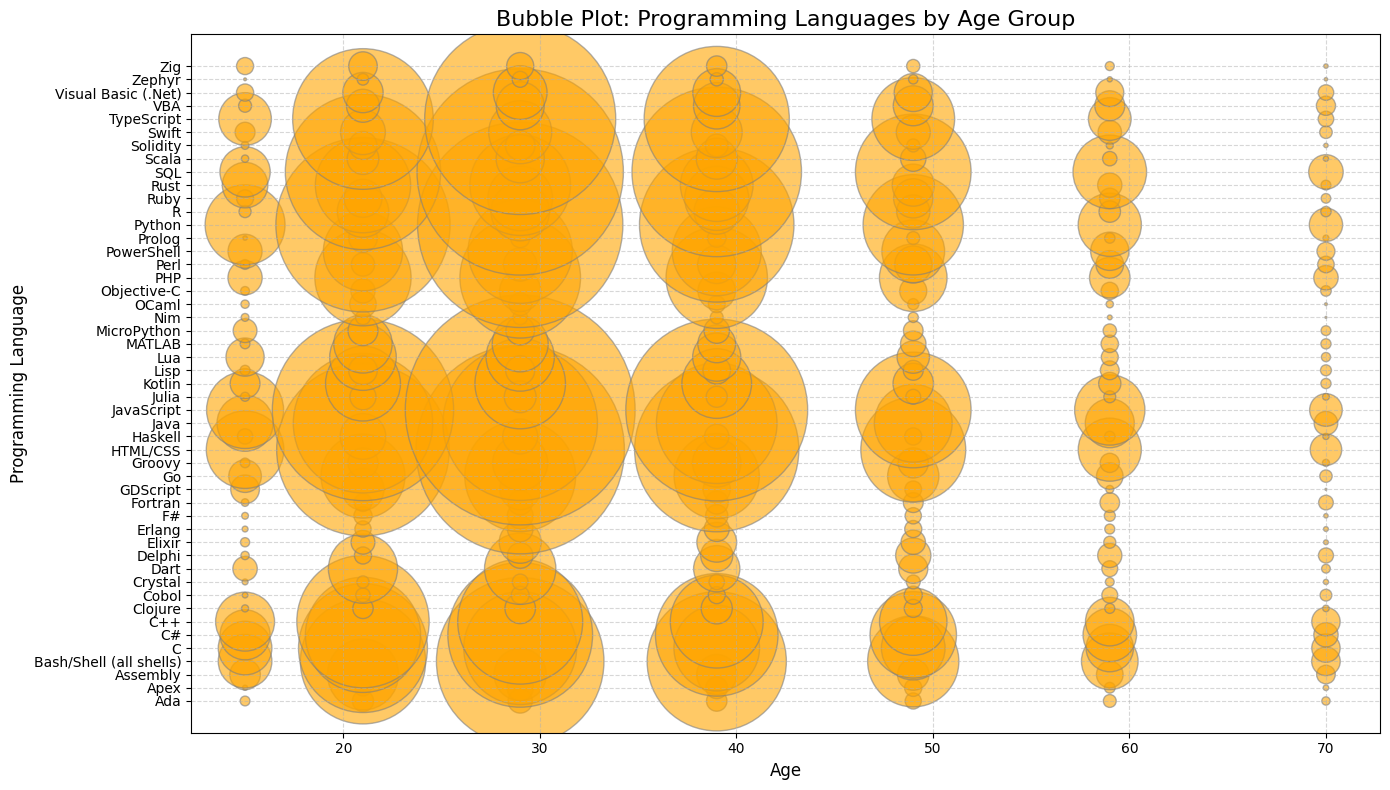

In [9]:
# Install required libraries (if not already installed)
!pip install --quiet pandas matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Map age ranges to a consistent numeric value (for plotting)
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Drop rows with missing LanguageHaveWorkedWith or AgeNum
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'AgeNum'])

# Create a DataFrame with exploded languages
df_exploded = df_clean.assign(Language=df_clean['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Group by Language and AgeNum to get frequency
grouped = df_exploded.groupby(['Language', 'AgeNum']).size().reset_index(name='Count')

# Bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    grouped['AgeNum'],
    grouped['Language'],
    s=grouped['Count'] * 2,  # Bubble size
    alpha=0.6,
    edgecolors='gray',
    c='orange'
)

plt.title('Bubble Plot: Programming Languages by Age Group', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


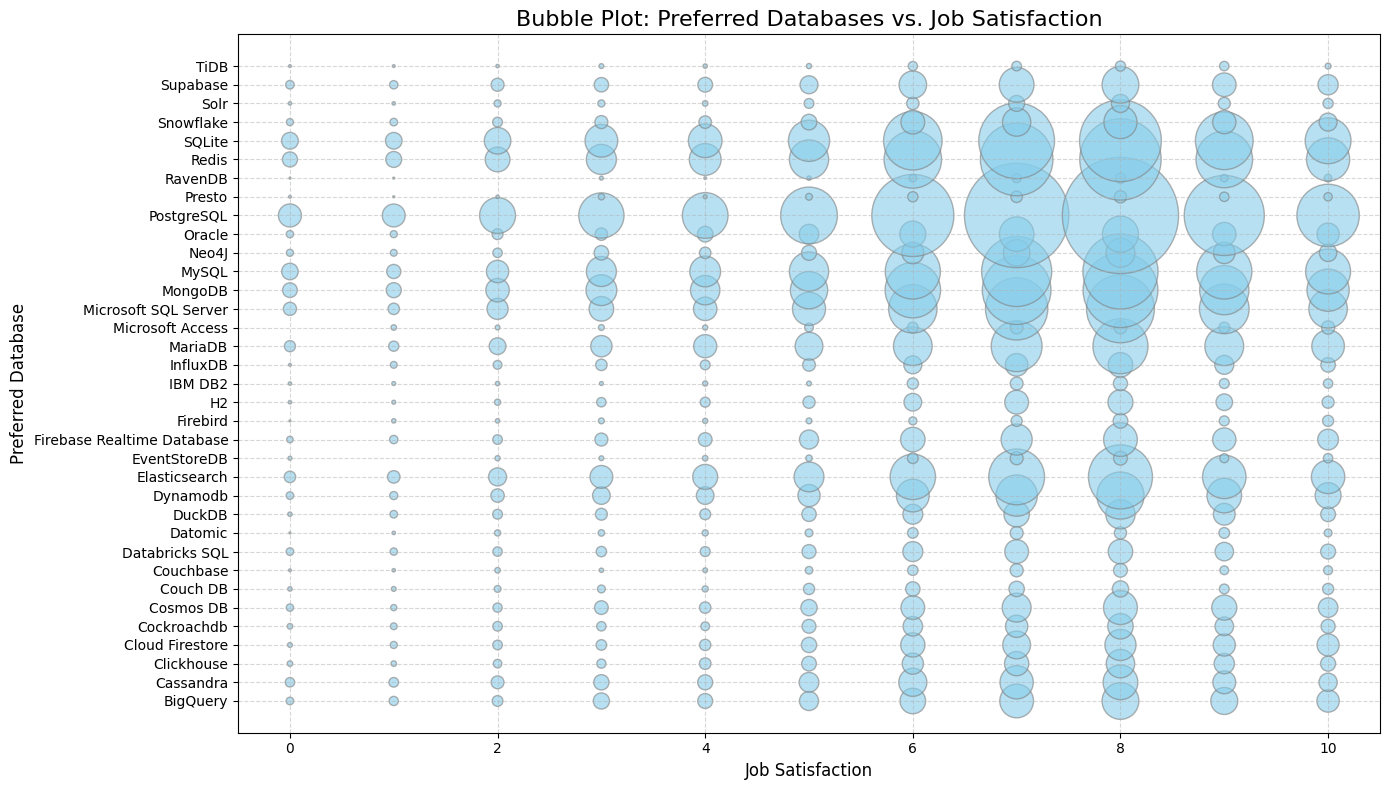

In [10]:
##Write your code here# Install required libraries (if not already installed)
!pip install --quiet pandas matplotlib

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Drop rows with missing DatabaseWantToWorkWith or JobSat
df_clean = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Explode multi-value entries (separated by semicolons)
df_exploded = df_clean.assign(Database=df_clean['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Group by Database and JobSat, and count respondents
grouped = df_exploded.groupby(['Database', 'JobSat']).size().reset_index(name='Count')

# Convert JobSat to numeric (if needed)
grouped['JobSat'] = pd.to_numeric(grouped['JobSat'], errors='coerce')
grouped = grouped.dropna(subset=['JobSat'])

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    grouped['JobSat'],
    grouped['Database'],
    s=grouped['Count'] * 2,
    alpha=0.6,
    c='skyblue',
    edgecolors='gray'
)

plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Preferred Database', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


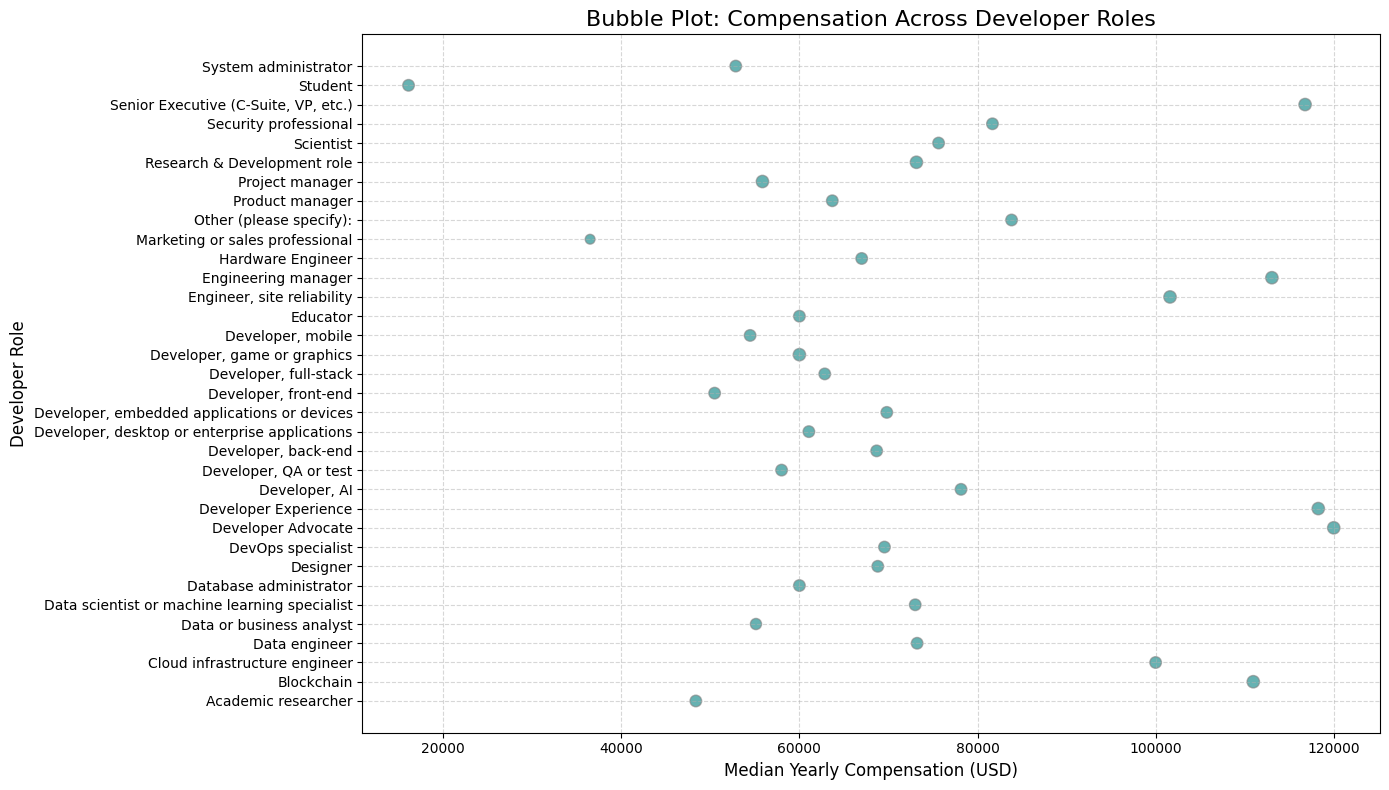

In [11]:
# Install required packages
!pip install --quiet pandas matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Clean data: drop missing values
df_clean = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'])

# Explode DevType where multiple roles exist
df_clean = df_clean.assign(DevType=df_clean['DevType'].str.split(';')).explode('DevType')

# Convert numeric fields
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')

# Drop any rows with invalid data
df_clean = df_clean.dropna(subset=['ConvertedCompYearly', 'JobSat'])

# Aggregate average compensation and average job satisfaction by DevType
agg = df_clean.groupby('DevType').agg({
    'ConvertedCompYearly': 'median',
    'JobSat': 'median',
    'DevType': 'count'
}).rename(columns={'DevType': 'Count'}).reset_index()

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    agg['ConvertedCompYearly'],
    agg['DevType'],
    s=agg['JobSat'] * 10,  # Bubble size from JobSat
    alpha=0.6,
    color='teal',
    edgecolors='gray'
)

plt.title('Bubble Plot: Compensation Across Developer Roles', fontsize=16)
plt.xlabel('Median Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Developer Role', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


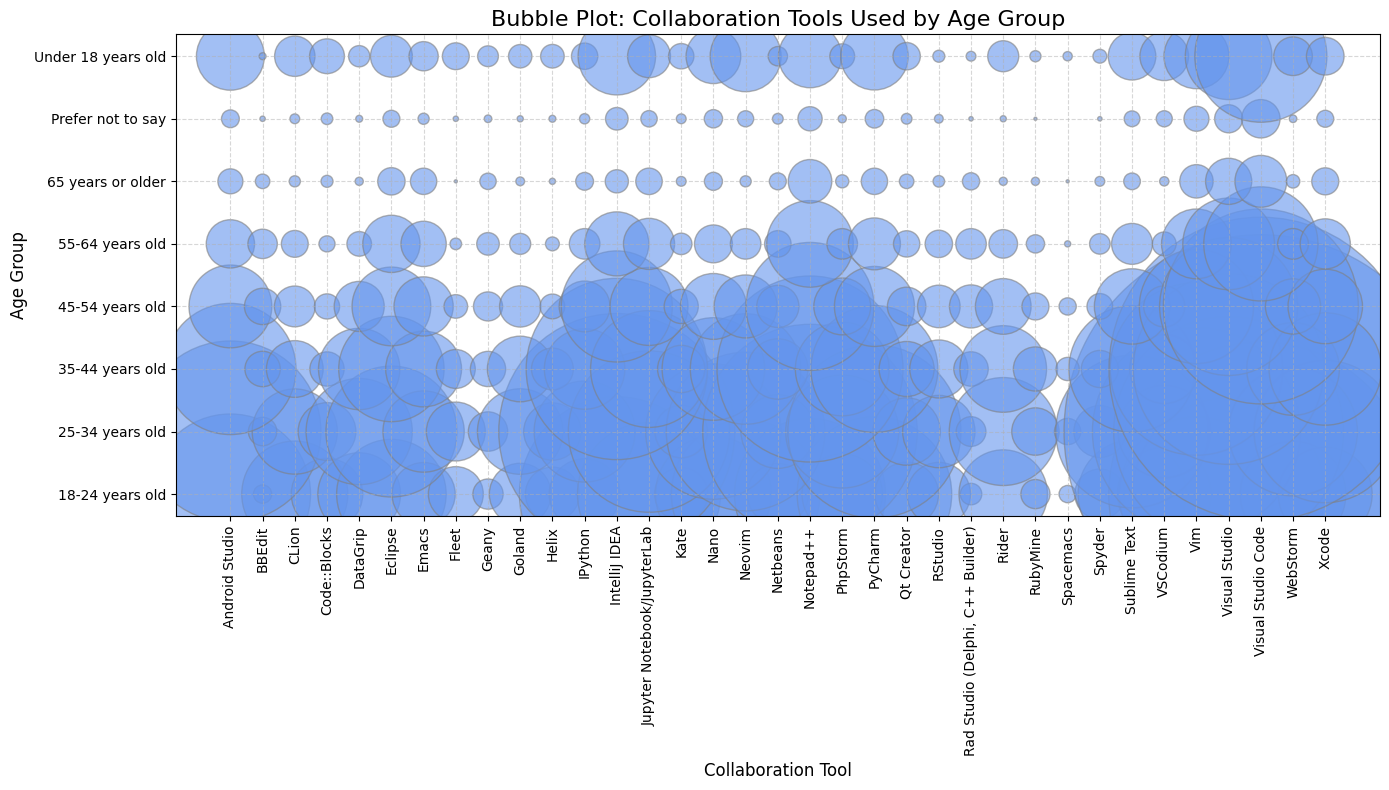

In [12]:
# Install required libraries
!pip install --quiet pandas matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Drop rows with missing collaboration tools or age
df_clean = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])

# Explode the multi-selection collaboration tools column
df_clean = df_clean.assign(NEWCollabToolsHaveWorkedWith=df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('NEWCollabToolsHaveWorkedWith')

# Group by age and tool, then count occurrences
grouped = df_clean.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    grouped['NEWCollabToolsHaveWorkedWith'],
    grouped['Age'],
    s=grouped['Count'] * 5,  # Adjust size for visibility
    alpha=0.6,
    color='cornflowerblue',
    edgecolors='gray'
)

plt.xticks(rotation=90)
plt.title('Bubble Plot: Collaboration Tools Used by Age Group', fontsize=16)
plt.xlabel('Collaboration Tool', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



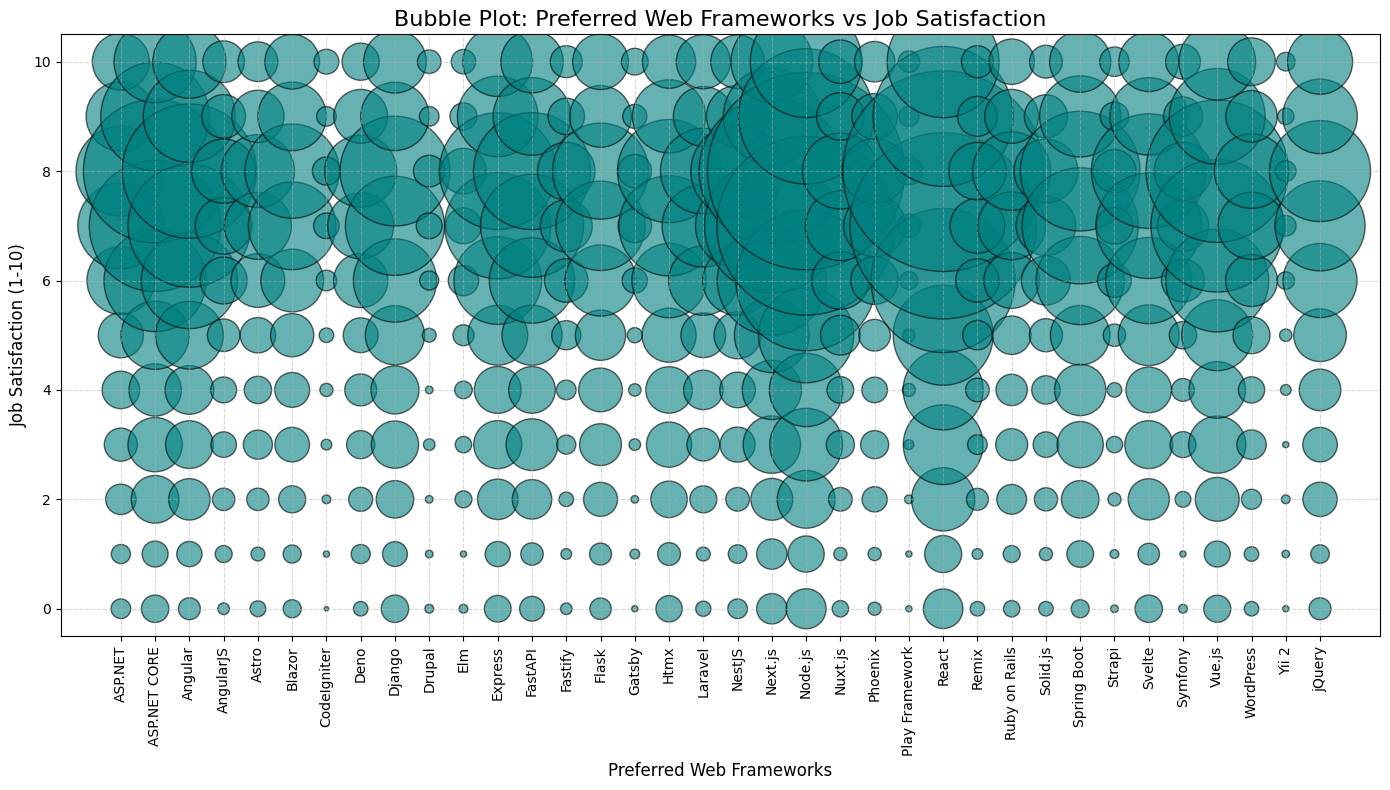

In [13]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Drop rows with missing WebframeWantToWorkWith or JobSat
df_clean = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Explode multi-selection web frameworks
df_clean = df_clean.assign(WebframeWantToWorkWith=df_clean['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')

# Group by web framework and job satisfaction, count respondents
grouped = df_clean.groupby(['WebframeWantToWorkWith', 'JobSat']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    grouped['WebframeWantToWorkWith'],
    grouped['JobSat'],
    s=grouped['Count'] * 10,  # Adjust bubble size for visibility
    alpha=0.6,
    color='teal',
    edgecolors='black'
)

plt.xticks(rotation=90)
plt.title('Bubble Plot: Preferred Web Frameworks vs Job Satisfaction', fontsize=16)
plt.xlabel('Preferred Web Frameworks', fontsize=12)
plt.ylabel('Job Satisfaction (1-10)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
